### Program written by Scott Midgley, 2021

Scope: To train and test LR models for band gap energy screening in the configuraional space of MgO-ZnO solid solutions. 

In [1]:
### USER INPUT REQUIRED ###

# Please paste in the path to the repositiory here an comment/uncomment as needed.
# E.g. rundir = r'C:\Users\<user>\Desktop\repository'

# Windows path
#repodir = r'<windows\path\here>'
#repodir = r'C:\Users\smidg\Desktop\ml\repository'

#Unix path
#repodir = '<unix/path/here>'
repodir = r'/home/mts87985/ml-thermo/Machine-Learning-for-Solid-Solutions/repository/'

In [2]:
### USER INPUT REQUIRED ###

# Define percentage of training data to use for training. 
split = 10
#split = 50
#split = 80
#split = 30

In [3]:
# Import modules. 
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os
from sklearn.linear_model import Lasso

In [4]:
# Start program timer.
start_time = time.time()

In [5]:
# Import data and shuffle (optional).
eners = pd.read_pickle(repodir + '/data/input_data.pkl')
eners = eners.sample(frac=1)
#Calculate mixing energies based on total DFT energy of phase separated end members. Add emix to data frame.  
Emg_end = -381.17925146/32
Ezn_end = -317.49620269/36
Emg_end = 24 * Emg_end
Ezn_end = 8 * Ezn_end
emix = eners['SCF Energy'] - (Emg_end + Ezn_end)
eners['Emix'] = emix

In [6]:
# Split data frame into training, validation, and testing data. 
if split == int(10):
    e_train = eners.iloc[1608:2412] #10% of data for training
elif split == int(30):
    e_train = eners.iloc[1608:4021] #30% of data for training
elif split == int(50):
    e_train = eners.iloc[1608:5630] #50% of data for training
elif split == int(80):
    e_train = eners.iloc[1608:] #80% of data for training
else:
    print('Error: please choose a valid train/test split.')
e_val = eners.iloc[804:1608] #10% of data for validation
e_test = eners.iloc[:804] #10% of data for testing model

In [7]:
# Convert Pandas columns to Numpy arrays. Reshaping to obtain array of nested brackets. 
Xtrain = e_train['Coulomb'].to_numpy()
ytrain = e_train['Emix'].to_numpy()
Xtrain = np.stack(Xtrain)
ytrain= np.stack(ytrain) 
Xval = e_val['Coulomb'].to_numpy()
yval = e_val['Emix'].to_numpy()
Xval = np.stack(Xval)
yval= np.stack(yval)
Xtest = e_test['Coulomb'].to_numpy()
ytest = e_test['Emix'].to_numpy()
Xtest = np.stack(Xtest)
ytest = np.stack(ytest)

In [8]:
# Define Lasso regularizer and train regressor.
lasso_reg = Lasso(alpha=0.0000001)
lasso_reg.fit(Xtrain, ytrain)

/home/mts87985/anaconda3/envs/ml-solid-solns/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001242687985065811, tolerance: 8.414710118191973e-05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-07)

In [9]:
# Print parameters.
r_sq = (lasso_reg.score(Xtrain, ytrain))
inter = ('intercept: ', lasso_reg.intercept_)
coef = ('coefficient:  ', lasso_reg.coef_)
print(r_sq)
print(inter)
print(coef)

0.9972340879463628
('intercept: ', 7.197101011278914)
('coefficient:  ', array([ 1.39455866e-03,  1.17700482e-04,  3.41455643e-05, -2.77530190e-06,
       -3.08059116e-05, -4.88821257e-05, -8.90979779e-05, -1.33921669e-04,
       -8.02544199e-04,  2.08480943e-03,  2.14505273e-03,  2.34882403e-03,
        2.53604808e-03,  2.64907757e-03,  2.83833578e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.35586775e-03,
        1.23222943e-03,  1.49688544e-03,  4.52490885e-04, -8.88383208e-04,
       -9.60882171e-04, -1.05720830e-03, -1.44183326e-03, -1.50465877e-03,
       -1.86227729e-03, -1.92942989e-03, -2.40201122e-03, -2.26310387e-03,
        1.43986777e-02,  3.32209019e-02,  3.74148703e-02,  3.68702188e-02,
        3.47228092e-02,  3.23308890e-02,  3.18801049e-02,  2.01026836e-02,
        2.25385929e-02,  6.84562197e-02,  0.00000000e+00, -1.96811982e-02,
       -1.44695184e-02, -1.66172590e-02, -1.75335768e-02, -3.30790124e-02,
       -3.92636604e-02, -4.

In [10]:
# Test linear regressor.
ypred = lasso_reg.predict(Xtest)

In [11]:
# Print metric.
mae = (mean_absolute_error(ytest, ypred))
print('mae = ', mae)

mae =  0.001297982450148213


Text(0, 0.5, 'Regressor')

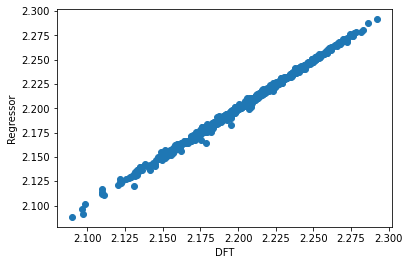

In [12]:
#Plot DFT mixing energy vs regressor predicted.
plt.scatter(ytest, ypred)# plot the predicted versus the actual gaps
plt.xlabel('DFT')
plt.ylabel('Regressor')
#plt.savefig('BGE_pred_vs_val.png')

In [13]:
# Print time taken by program to run. 
time_s = round((time.time() - start_time), 2)
time_m = round((time_s/60), 2)
print(time_s,'sec')
print(time_m, 'min')

113.2 sec
1.89 min
